## Text Classification

In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import imdb
# https://www.imdb.com/

In [4]:
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=20000)

In [8]:
print(X[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [9]:
y_train[0]

1

In [13]:
y_train[1]

0

In [10]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded0 = " ".join( [reverse_index.get(i - 3, "#") for i in X[0]] )
decoded1 = " ".join( [reverse_index.get(i - 3, "#") for i in X[1]] )
print(decoded0) 

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what th

In [12]:
print(decoded1)

# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their # sickening that men actually wore them and the music is just # trash that plays over and over again in almost every scene there is trashy music boobs and # taking away bodies and the gym still doesn't close for # all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


In [20]:
print(X[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [17]:
# text to vector
def vect(seq, dim=20000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

In [21]:
X_train=vect(X)
X_test=vect(X_test)

In [23]:
len(X_train[0])

20000

In [24]:
net = models.Sequential()
net.add(layers.Dense(256, activation='relu', input_shape=(20000,)))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dense(1, activation='sigmoid'))

net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

In [25]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
val = net.fit(partial_X_train, partial_y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
118/118 [==============================] - 7s 62ms/step - loss: 0.3539 - acc: 0.8454 - val_loss: 0.2887 - val_acc: 0.8816
Epoch 2/10
118/118 [==============================] - 7s 58ms/step - loss: 0.1159 - acc: 0.9591 - val_loss: 0.3437 - val_acc: 0.8809
Epoch 3/10
118/118 [==============================] - 7s 59ms/step - loss: 0.0351 - acc: 0.9895 - val_loss: 0.4486 - val_acc: 0.8738
Epoch 4/10
118/118 [==============================] - 7s 59ms/step - loss: 0.0095 - acc: 0.9987 - val_loss: 0.5204 - val_acc: 0.8778
Epoch 5/10
118/118 [==============================] - 7s 59ms/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.5870 - val_acc: 0.8778
Epoch 6/10
118/118 [==============================] - 7s 58ms/step - loss: 6.8698e-04 - acc: 1.0000 - val_loss: 0.6237 - val_acc: 0.8779
Epoch 7/10
118/118 [==============================] - 7s 59ms/step - loss: 3.9766e-04 - acc: 1.0000 - val_loss: 0.6490 - val_acc: 0.8783
Epoch 8/10
118/118 [==============================] - 7s 58ms

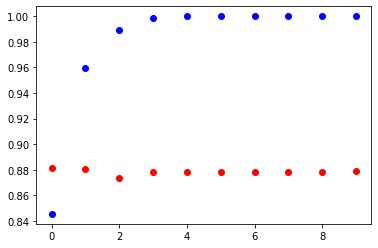

In [27]:
val_dict = val.history
acc = val_dict['acc']
val_acc = val_dict['val_acc']
x = np.arange(0,len(acc))

plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [28]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.7769 - acc: 0.8638
